In [1]:
import numpy as np
import matplotlib.pyplot as plt
import prospect.io.read_results as pread
import glob

In [2]:
def find_nearest(array,value):
    idx = (np.abs(np.array(array)-value)).argmin()
    return idx

In [3]:
def get_best(res, **kwargs):
    """Get the maximum a posteriori parameters.                                                                                                               
    From prospect.utils.plotting                                                                                                                              
    """
    imax = np.argmax(res['lnprobability'])
    # there must be a more elegant way to deal with differnt shapes                                                                                           
    try:
        i, j = np.unravel_index(imax, res['lnprobability'].shape)
        theta_best = res['chain'][i, j, :].copy()
    except(ValueError):
        theta_best = res['chain'][imax, :].copy()

    theta_names = res.get('theta_labels', res['model'].theta_labels())
    return theta_names, theta_best

In [23]:
#attenuation from prospector

gal = 120

dir_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_nonparametricSFH/filtered_dirichlet/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'
#dirmm_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_massmetal/dirichlet/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'
#contmm_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_massmetal/continuity/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'
cont_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_nonparametricSFH/filtered_cont/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'
#windowz_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_metal_test/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'
#dust1_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_nonparametricSFH/dust1_toggle/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'
tau_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_parametricSFH/tau/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'
ultra_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_ultra/reparam_noll/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'


res_dir, res_cont, res_tau, res_ultra = 0, 0, 0, 0

for file in glob.glob(dir_file):
    res_dir, _, _ = pread.results_from(file)
    
for file in glob.glob(cont_file):
    res_cont, _, _ = pread.results_from(file)
    
for file in glob.glob(tau_file):
    res_tau, _, _ = pread.results_from(file)
    
for file in glob.glob(ultra_file):
    res_ultra, _, _ = pread.results_from(file)

In [24]:
pd_atten = np.load('/Volumes/ufrc/narayanan/s.lower/pd_runs/simba_m25n512/snap305_boxtest/attenuation_curves/unfiltered/attenuation_curve.305_galaxy'+str(gal)+'.npz')
filt_atten = np.load('/Volumes/ufrc/narayanan/s.lower/pd_runs/simba_m25n512/snap305_boxtest/attenuation_curves/attenuation_curve.305_galaxy'+str(gal)+'.npz')

In [25]:
pd_wav = pd_atten['wav_rest']
pd_tau = pd_atten['tau']

pd_V = find_nearest(pd_wav, 0.55)

filt_wav = filt_atten['wav_rest']
filt_tau = filt_atten['tau']

filt_V = find_nearest(filt_wav, 0.55)

In [26]:
sps_dir = pread.get_sps(res_dir)
thetas_dir, theta_best_dir = get_best(res_dir)
dust2_idx_dir = [i for i, s in enumerate(thetas_dir) if 'dust2' in s]
dust2_dir = theta_best_dir[dust2_idx_dir[0]]
dustindex_idx_dir = [i for i, s in enumerate(thetas_dir) if 'dust_index' in s]
dust_index_dir = theta_best_dir[dustindex_idx_dir[0]]


In [27]:
sps_cont = pread.get_sps(res_cont)
thetas_cont, theta_best_cont = get_best(res_cont)
dust2_idx_cont = [i for i, s in enumerate(thetas_cont) if 'dust2' in s]
dust2_cont = theta_best_cont[dust2_idx_cont[0]]
dustindex_idx_cont = [i for i, s in enumerate(thetas_cont) if 'dust_index' in s]
dust_index_cont = theta_best_cont[dustindex_idx_cont[0]]

In [28]:
sps_ultra = pread.get_sps(res_ultra)
thetas_ultra, theta_best_ultra = get_best(res_ultra)
dust2_idx_ultra = [i for i, s in enumerate(thetas_ultra) if 'dust2' in s]
dust2_ultra = theta_best_ultra[dust2_idx_ultra[0]]
uvb_idx_ultra = [i for i, s in enumerate(thetas_ultra) if 'uvb' in s]
uvb_ultra = theta_best_ultra[uvb_idx_ultra[0]]
dustindex_idx_ultra = [i for i, s in enumerate(thetas_ultra) if 'dust_index' in s]
dust_index_ultra = theta_best_ultra[dustindex_idx_ultra[0]]

In [29]:
sps_tau = pread.get_sps(res_tau)
thetas_tau, theta_best_tau = get_best(res_tau)
dust2_idx_tau = [i for i, s in enumerate(thetas_tau) if 'dust2' in s]
dust2_tau = theta_best_tau[dust2_idx_tau[0]]
dustindex_idx_tau = [i for i, s in enumerate(thetas_tau) if 'dust_index' in s]
dust_index_tau = theta_best_tau[dustindex_idx_tau[0]]

In [11]:
#global attn curve params
dd63=6300.00
lamv=5500.0
dlam=350.0
lamuvb=2175.0

In [12]:
def Cardelli_conroyparam(lam, mwr, uvb):
    x = 1e4 / lam
    y = x - 1.82
    a = np.empty(len(x))
    b = np.empty(len(x))
    attn_curve = np.empty(len(x))
    for i in range(len(x)):
        #print(x[i])
        if x[i] < 1.1:
            a[i] = 0.574*x[i]**(1.61)
            b[i] = ((-0.527*x[i]**(1.61)) / mwr)
        elif x[i] < 3.3:
            a[i] = 1 + 0.177*y[i] - 0.594*y[i]**2 - 0.0243*y[i]**3 + 0.721*y[i]**4 + 0.0198*y[i]**5 - 0.775*y[i]**6 + 0.33*y[i]**7
            b[i] = (1.413*y[i] + 2.283*y[i]**2 + 1.072*y[i]**3 - 5.385*y[i]**4 - 0.622*y[i]**5 + 5.303*y[i]**6 - 2.09*y[i]**7) / mwr
        elif x[i] < 5.9:
            f_a = (3.3 / x[i])**6 * (-0.037 + 0.0469*uvb - (0.601*uvb / mwr) + 0.542/mwr)
            a[i] = 1.752 - 0.316*x[i] - (0.104*uvb / ((x[i] - 4.67)**2 + 0.341)) + f_a
            b[i] = ((-3.09 + 1.825*x[i] + (1.206*uvb / ((x[i] - 4.62)**2 + 0.263))) / mwr)
        elif x[i] < 8.:
            f_a = -0.0447 * (x[i] - 5.9)**2 - 0.00978*(x[i]-5.9)**3
            f_b = 0.213*(x[i]-5.9)**2 + 0.121 * (x[i]-5.9)**3
            a[i] = (1.752 - 0.316*x[i] - (0.104*uvb / ((x[i] - 4.67)**2 + 0.341)) + f_a)
            b[i] = ((-3.09 + 1.825*x[i] + (1.206*uvb / ((x[i] - 4.62)**2 + 0.263)) + f_b) / mwr)
    
    
    for i in range(len(x)):
        attn_curve[i] = (a[i] + b[i])
        
    
    return attn_curve

In [13]:
def Cardelli_fspsparam(lam, dust2, mwr, uvb):
    x = 1e4 / lam
    y = x - 1.82
    a = np.empty(len(x))
    b = np.empty(len(x))
    attn_curve = np.empty(len(x))
    for i in range(len(x)):
        
        
        
        if x[i] > 12.: #far far UV?
            a[i] = -1.073 - 0.628*(12.-8.)+0.137*(12.-8.)**2-0.070*(12.-8.)**3
            b[i] = (13.67+4.257*(12.-8.)-0.42*(12.-8.)**2+0.374*(12.-8.)**3) / mwr
        elif x[i] > 8.: #far UV
            a[i] = -1.073-0.628*(x[i]-8.)+0.137*(x[i]-8.)**2-0.070*(x[i]-8.)**3
            b[i] = (13.67+4.257*(x[i]-8.)-0.42*(x[i]-8.)**2+0.374*(x[i]-8.)**3) / mwr
        elif x[i] > 5.9: #mid-UV
            f_a = -0.04473*(x[i]-5.9)**2-0.009779*(x[i]-5.9)**3
            f_b =  0.2130*(x[i]-5.9)**2+0.1207*(x[i]-5.9)**3
            a[i]  = 1.752-0.316*x[i]-0.104/((x[i]-4.67)**2+0.341)*uvb + f_a
            b[i]  = (-3.09+1.825*x[i]+1.206/((x[i]-4.62)**2+0.263)*uvb + f_b) / mwr
             
        elif x[i] > 3.3: #near UV
            f_a = (3.3/x[i])**6.*(-0.037 + 0.0469*uvb - (0.601*uvb / mwr) + 0.542/mwr)
            a[i] = 1.752-0.316*x[i]-0.104/((x[i]-4.67)**2+0.341)*uvb + f_a
            b[i] = (-3.09+1.825*x[i]+1.206/((x[i]-4.62)**2+0.263)*uvb ) / mwr
            
        elif x[i] > 1.1: #optical - NIR   
            a[i] = 1 + 0.177*y[i] - 0.50477*y[i]**2 - 0.0243*y[i]**3 + 0.721*y[i]**4 + 0.0198*y[i]**5 - 0.7753*y[i]**6 + 0.33*y[i]**7
            b[i] = (1.4134*y[i] + 2.283*y[i]**2 + 1.072*y[i]**3 - 5.385*y[i]**4 - 0.6225*y[i]**5 + 5.303*y[i]**6 - 2.09*y[i]**7) / mwr
        elif x[i] > 0.1:
            a[i] = 0.574*x[i]**1.61
            b[i] = (-0.527*x[i]**1.61) / mwr
    
    
    for i in range(len(x)):
        attn_curve[i] = (a[i] + b[i])
        
    
    return attn_curve*dust2
    
    
    
    

In [14]:
def Kriek_Conroy(lam, dust2, dust_index): 
    w63 = find_nearest(lam,dd63)
    cal00 = np.zeros(np.shape(lam)[0])
    for i in range(w63, np.shape(lam)[0]):
        cal00[i] = 1.17*( -1.857+1.04*(1.0e4/lam[i])) + 1.78 
    for i in range(0, w63):
        cal00[i]= 1.17*(-2.156+1.509*(1.0e4/lam[i]) -0.198*(1.0e4/lam[i])**2 + 0.011*(1.0e4/lam[i])**3) + 1.78
    #R=4.05 NB: I'm not sure I have this normalization correct...                                                                                            
    cal00 = (cal00/0.44/4.05)

    eb = 0.85 - (1.9 * dust_index)  #KC13 Eqn 3                                                                                                           

    #Drude profile for 2175A bump                                                                                                                            
    drude = eb*(lam*dlam)**2 / ( (lam**2-lamuvb**2)**2 + (lam*dlam)**2 )

    attn_curve = dust2*(cal00+drude/4.05)*(lam/lamv)**dust_index

    return attn_curve



In [15]:
def Noll09(lam, dust2, dust_index, uvb): 
    w63 = find_nearest(lam,dd63)
    cal00 = np.zeros(np.shape(lam)[0])
    for i in range(w63, np.shape(lam)[0]):
        cal00[i] = 1.17*( -1.857+1.04*(1.0e4/lam[i])) + 1.78 
    for i in range(0, w63):
        cal00[i]= 1.17*(-2.156+1.509*(1.0e4/lam[i]) -0.198*(1.0e4/lam[i])**2 + 0.011*(1.0e4/lam[i])**3) + 1.78
    #R=4.05 NB: I'm not sure I have this normalization correct...                                                                                            
    cal00 = (cal00/0.44/4.05)

    eb = uvb                                                                                                          

    #Drude profile for 2175A bump                                                                                                                            
    drude = eb*(lam*dlam)**2 / ( (lam**2-lamuvb**2)**2 + (lam*dlam)**2 )

    attn_curve = dust2*(cal00+drude/4.05)*(lam/lamv)**dust_index

    return attn_curve

In [16]:
def Calzetti(lam, dust2):
    w63 = find_nearest(lam,dd63)
    cal00 = np.zeros(np.shape(lam)[0])
    for i in range(w63, np.shape(lam)[0]):
        cal00[i] = 1.17*( -1.857+1.04*(1.0e4/lam[i])) + 1.78
    for i in range(0, w63):
        cal00[i]= 1.17*(-2.156+1.509*(1.0e4/lam[i]) -0.198*(1.0e4/lam[i])**2 + 0.011*(1.0e4/lam[i])**3) + 1.78
    #R=4.05 NB: I'm not sure I have this normalization correct...                                                                                            
    cal00 = cal00/0.44/4.05
    
    attn_curve = cal00 * dust2
    
    return attn_curve

In [17]:
wav = np.linspace(100, 15000, 10000)
wav5500 = np.full(len(wav), 5500)

In [30]:
curve_dir = Kriek_Conroy(wav, dust2_dir, dust_index_dir) / Kriek_Conroy(wav5500, dust2_dir, dust_index_dir)
curve_cont = Kriek_Conroy(wav, dust2_cont, dust_index_cont) / Kriek_Conroy(wav5500, dust2_cont, dust_index_cont)
curve_ultra = Noll09(wav, dust2_ultra, dust_index_ultra, uvb_ultra) / Noll09(wav5500, dust2_ultra, dust_index_ultra, uvb_ultra)
curve_tau = Kriek_Conroy(wav, dust2_tau, dust_index_tau) / Kriek_Conroy(wav5500, dust2_tau, dust_index_tau)



Text(0.5, 1.0, 'Galaxy 120: KC Attenuation')

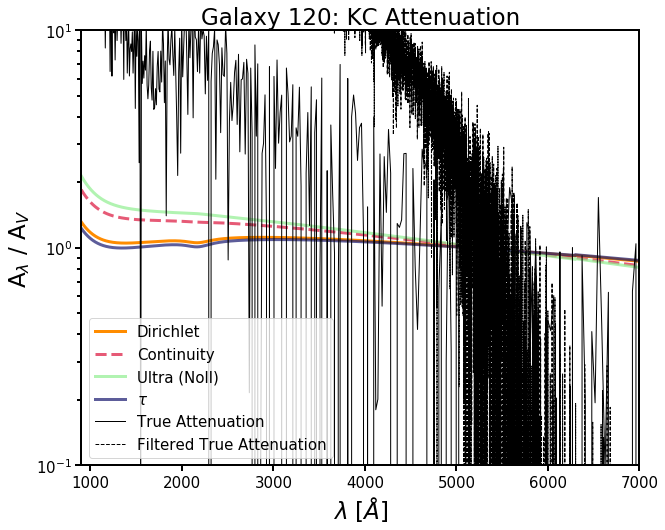

In [31]:
plt.figure(figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.tick_params(axis='both', which='major', width=2, length=6, labelsize=15)
plt.tick_params(axis='both', which='minor', width=2, length=4)




plt.plot(wav, curve_dir, color='darkorange', lw=3, label='Dirichlet')
plt.plot(wav, curve_cont, color='crimson', alpha=0.7, ls='--', lw=3, label='Continuity')
plt.plot(wav, curve_ultra, color='lightgreen', alpha=0.7, lw=3, label='Ultra (Noll)')
plt.plot(wav, curve_tau, color='midnightblue', alpha=0.7, lw=3, label=r'$\tau$')
plt.plot(pd_wav*1.0e4, (2.5*np.log10(np.exp(pd_tau[0])))/(2.5*np.log10(np.exp(pd_tau[0][find_nearest(pd_wav, 0.55)]))), color='black', lw=1., label='True Attenuation')
plt.plot(filt_wav*1.0e4, (2.5*np.log10(np.exp(filt_tau[0])))/(2.5*np.log10(np.exp(filt_tau[0][find_nearest(filt_wav, 0.55)]))), color='black', ls='--', lw=1., label='Filtered True Attenuation')

plt.yscale('log')

#plt.xscale('log')
plt.xlim([900, 7000])
plt.xlabel('$\lambda$ [$\AA$]', fontsize=23)
plt.ylim([1e-1, 10])
plt.ylabel('A$_{\lambda}$ / A$_{V}$', fontsize=23)
plt.legend(loc='best', fontsize=15)
plt.title('Galaxy '+str(gal)+': KC Attenuation', fontsize=23)

#plt.show()
#plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/attenuation_curve'+str(gal)+'_old.png', dpi=300)